# Exploratory Data Analysis (EDA) Report

- Author: [Kiruthikaa](https://github.com/kiruthikaa2512/)
- Repository: [datafun-05-sql-project](https://github.com/kiruthikaa2512/datafun-05-sql-project)
- Date: June 04, 2025
- Purpose: The purpose of this project is to explore and analyze a relational database that tracks technical issues and their corresponding analyses. Using Python and SQL, we aim to uncover patterns, trends, and insights from the structured data to better understand issue frequency, resolution status, and the types of analysis performed. This will demonstrate the integration of SQL with Python for effective data exploration and decision support.

## Introduction
### Dataset Overview:
The dataset contains two related tables — issues and analysis. The issues table records software/system issues with details like task ID, description, category, creation date, and status. The analysis table captures root cause analyses linked to issues via task IDs, including analysis type, root causes, resolutions, and resolution dates.

Goals:
Understand the distribution of issue types, their statuses, root causes, and resolution effectiveness to identify patterns and areas for process improvements.

### 1. Utils Logger Script

In [1]:
"""
Logger Setup Script
File: utils_logger.py
"""
import logging
import pathlib 
import os
# Imports from external packages
from loguru import logger

# Setup a simple logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)




CURRENT_SCRIPT = pathlib.Path("__main__").stem  # Default to "__main__" if running as a script
print(CURRENT_SCRIPT)  # If running as a script, use the actual file name

# Set directory where logs will be stored
LOG_FOLDER: pathlib.Path = pathlib.Path("logs")

# Set the name of the log file
LOG_FILE: pathlib.Path = LOG_FOLDER.joinpath("project_log.log")

# Ensure the log folder exists or create it
try:
    LOG_FOLDER.mkdir(exist_ok=True)
    logger.info(f"Log folder created at: {LOG_FOLDER}")
except Exception as e:
    logger.error(f"Error creating log folder: {e}")

# Configure Loguru to write to the log file
try:
    logger.add(LOG_FILE, level="INFO")
    logger.info(f"Logging to file: {LOG_FILE}")
except Exception as e:
    logger.error(f"Error configuring logger to write to file: {e}")


def get_log_file_path() -> pathlib.Path:
    """Return the path to the log file."""
    return LOG_FILE


def log_example() -> None:
    """Example logging function to demonstrate logging behavior."""
    try:
        logger.info("This is an example info message.")
        logger.warning("This is an example warning message.")
        logger.error("This is an example error message.")
    except Exception as e:
        logger.error(f"An error occurred during logging: {e}")


def main() -> None:
    """Main function to execute logger setup and demonstrate its usage."""
    logger.info(f"STARTING {CURRENT_SCRIPT}.py")

    # Call the example logging function
    log_example()

    logger.info(f"View the log output at {LOG_FILE}")
    logger.info(f"EXITING {CURRENT_SCRIPT}.py.")


# Conditional execution block that calls main() only when this file is executed directly
if __name__ == "__main__":
    main()


INFO:__main__:Log folder created at: logs
ERROR:__main__:Error configuring logger to write to file: 'Logger' object has no attribute 'add'
INFO:__main__:STARTING __main__.py
INFO:__main__:This is an example info message.
ERROR:__main__:This is an example error message.
INFO:__main__:View the log output at logs\project_log.log
INFO:__main__:EXITING __main__.py.


__main__


## Step 2: Database Setup
Creating the SQLite Database Using Python
Connect to the SQLite database stored in the data folder.
Use pandas and sqlite3 to run SQL queries and explore the results as DataFrames.

In [2]:
from pathlib import Path
import sys
import sqlite3
sys.path.append(str(Path('.').resolve()))

ROOT_DIR = Path.cwd().resolve()
DATA_FOLDER = ROOT_DIR / "data"
DB_PATH = Path(r"C:\Projects\Repos\datafun-05-sql-project\data\project.sqlite3")

# Ensure data folder exists
DATA_FOLDER.mkdir(exist_ok=True)

# Establish database connection
try:
    connection = sqlite3.connect(DB_PATH)
    logger.info(f"Connected to database: {DB_PATH}")
except Exception as e:
    logger.error(f"Connection error: {e}")

INFO:__main__:Connected to database: C:\Projects\Repos\datafun-05-sql-project\data\project.sqlite3


## 3. Creating Tables
We set up the schema with **CREATE TABLE** statements. This ensures a one-to-many relationship between issues and analysis.

In [3]:
import textwrap
import pandas as pd

cursor = connection.cursor()  # Explicitly define cursor

# Enable Foreign Key Support
cursor.execute("PRAGMA foreign_keys = ON;")
connection.commit()
print("Foreign keys enabled.")

# Drop existing tables

cursor.execute("DROP TABLE IF EXISTS analysis;")
cursor.execute("DROP TABLE IF EXISTS issues;")
connection.commit()
print("Tables dropped successfully.")
logger.info("Tables dropped successfully.")

# Create Issues Table
sql_create_issues = textwrap.dedent("""
    CREATE TABLE issues (
        task_id TEXT PRIMARY KEY,
        description TEXT,
        category TEXT,
        created_date TEXT,
        status TEXT
    );
""")

# Create Analysis Table
sql_create_analysis = textwrap.dedent("""
    CREATE TABLE analysis (
        analysis_id TEXT PRIMARY KEY,
        task_id TEXT,
        type_of_analysis TEXT,
        root_cause TEXT,
        resolution TEXT,
        resolution_date DATE,
        FOREIGN KEY (task_id) REFERENCES issues (task_id)
    );
""")

# Execute CREATE TABLE commands
cursor.execute(sql_create_issues)
cursor.execute(sql_create_analysis)
connection.commit()
print("Tables created successfully.")
logger.info("Database tables created successfully.")

# **Display created tables in the notebook**
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
df_tables = pd.DataFrame(tables, columns=["Table Name"])
print("Tables in database:")
display(df_tables)  # Ensures tables are shown clearly in Jupyter Notebook

INFO:__main__:Tables dropped successfully.
INFO:__main__:Database tables created successfully.


Foreign keys enabled.
Tables dropped successfully.
Tables created successfully.
Tables in database:


,Table Name
0,issues
1,analysis


   ## 4. Data Insertion
   We insert sample records into the database for both the tables that we created in our prrevious step.

In [4]:
# Optional cleanup: remove existing records to avoid PRIMARY KEY conflicts
cursor.executescript("""
DELETE FROM analysis;
DELETE FROM issues;
""")
connection.commit()
# Sample data insertion script for `issues` and `analysis` tables
# This script inserts sample records into the `issues` and `analysis` tables.
# Insert records into `issues`
insert_issues_sql = textwrap.dedent(""" INSERT INTO issues (task_id, description, category, created_date, status) VALUES
('T23465', 'System outage in zone 1', 'Infrastructure', '2024-05-01', 'Closed'),
('T23468', 'Incorrect data on dashboard', 'Data Quality', '2024-05-03', 'Open'),
('T23475', 'Delay in daily ETL process', 'ETL', '2024-05-04', 'In Progress'),
('T23865', 'Frequent login failures', 'Authentication', '2024-05-06', 'Closed'),
('T23363', 'Missing entries in report', 'Reporting', '2024-05-07', 'Open'),
('T23432', 'Deployment failed to include several backend services causing runtime errors in production.', 'Deployment Error', '2025-05-16', 'Closed'),
('T23168', 'Critical bugs were found in the latest release that slipped through due to missing automated tests.', 'Quality Assurance', '2025-05-27', 'Closed'),
('T23482', 'Inconsistent system behavior across environments traced back to differences in config files', 'Configuration Management', '2025-05-28', 'Open'),
('T23861', 'Generated reports contained invalid values due to data corruption during nightly ETL processes.', 'Data Integrity', '2025-05-05', 'In Progress'),
('T23333', 'Feature development was misaligned with business needs due to lack of early stakeholder feedback.', 'Requirements Gathering', '2025-05-05', 'Closed');
""")

# View all records from 'issues'
df_issues = pd.read_sql_query("SELECT * FROM issues;", connection)
display(df_issues)
print(f"Issues dataframe shape: {df_issues.shape}")

# Insert records into `analysis`
insert_analysis_sql = textwrap.dedent("""
    INSERT INTO analysis (task_id, analysis_id, type_of_analysis, root_cause, resolution, resolution_date) VALUES
    ('T23465', 'A001', '5 Whys', 'Power supply issue', 'Installed UPS', '2025-05-02'),
('T23468', 'A002', 'Fishbone', 'Wrong join logic in query', 'Fixed join conditions', '2025-05-04'),
('T23475', 'A003', 'Pareto', 'Dependency on external API', 'Added retry mechanism', '2025-05-05'),
('T23865', 'A004', 'Root Cause Tree', 'Session timeout misconfig', 'Increased session timeout', '2025-05-07'),
('T23363', 'A005', '5 Whys', 'Scheduled job skipped', 'Rescheduled job', '2025-05-08'),
('T23432', 'A006', 'Fishbone', 'Incomplete deployment', 'Re-deployed with all components verified', '2025-05-17'),
('T23168', 'A007', 'Pareto', 'Lack of test coverage', 'Added unit and integration tests', '2025-05-29'),
('T23482', 'A008', 'Root Cause Tree', 'Configuration drift', 'Standardized and locked configuration', '2025-06-29'),
('T23861', 'A009', 'Root Cause Tree', 'Data corruption during ETL', 'Implemented checksums and validation', '2025-05-07'),
('T23333', 'A010', 'Root Cause Tree', 'Missing stakeholder input', 'Conducted stakeholder review session', '2025-05-07');
""")

# View all records from 'analysis'
df_analysis = pd.read_sql_query("SELECT * FROM analysis;", connection)
display(df_analysis)
print(f"Analysis dataframe shape: {df_analysis.shape}")

# Execute both inserts
cursor.executescript(insert_issues_sql + insert_analysis_sql)
connection.commit()

print("Sample records inserted successfully.")
logger.info("Sample data inserted into 'issues' and 'analysis' tables.")

# Expand display settings for full visibility
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_colwidth', None)     # Do not truncate column content
pd.set_option('display.expand_frame_repr', False)  # Don't wrap DataFrame across lines

,task_id,description,category,created_date,status


Issues dataframe shape: (0, 5)


,analysis_id,task_id,type_of_analysis,root_cause,resolution,resolution_date


INFO:__main__:Sample data inserted into 'issues' and 'analysis' tables.


Analysis dataframe shape: (0, 6)
Sample records inserted successfully.


## **5. Querying the Data**
Read Records

In [5]:
# View all records from 'issues'
df_issues = pd.read_sql_query("SELECT * FROM issues;", connection)
display(df_issues)
print(f"Issues dataframe shape: {df_issues.shape}")

# View all records from 'analysis'
df_analysis = pd.read_sql_query("SELECT * FROM analysis;", connection)
display(df_analysis)
print(f"Analysis dataframe shape: {df_analysis.shape}")

for table in ['issues', 'analysis']:
    count_query = f"SELECT COUNT(*) FROM {table};"
    count = pd.read_sql_query(count_query, connection).iloc[0,0]
    print(f"Table '{table}' has {count} rows")

    logger.info(f"Table '{table}' has {count} rows")

,task_id,description,category,created_date,status
0,T23465,System outage in zone 1,Infrastructure,2024-05-01,Closed
1,T23468,Incorrect data on dashboard,Data Quality,2024-05-03,Open
2,T23475,Delay in daily ETL process,ETL,2024-05-04,In Progress
3,T23865,Frequent login failures,Authentication,2024-05-06,Closed
4,T23363,Missing entries in report,Reporting,2024-05-07,Open
5,T23432,Deployment failed to include several backend services causing runtime errors in production.,Deployment Error,2025-05-16,Closed
6,T23168,Critical bugs were found in the latest release that slipped through due to missing automated tests.,Quality Assurance,2025-05-27,Closed
7,T23482,Inconsistent system behavior across environments traced back to differences in config files,Configuration Management,2025-05-28,Open
8,T23861,Generated reports contained invalid values due to data corruption during nightly ETL processes.,Data Integrity,2025-05-05,In Progress
9,T23333,Feature development was misaligned with business needs due to lack of early stakeholder feedback.,Requirements Gathering,2025-05-05,Closed


Issues dataframe shape: (10, 5)


,analysis_id,task_id,type_of_analysis,root_cause,resolution,resolution_date
0,A001,T23465,5 Whys,Power supply issue,Installed UPS,2025-05-02
1,A002,T23468,Fishbone,Wrong join logic in query,Fixed join conditions,2025-05-04
2,A003,T23475,Pareto,Dependency on external API,Added retry mechanism,2025-05-05
3,A004,T23865,Root Cause Tree,Session timeout misconfig,Increased session timeout,2025-05-07
4,A005,T23363,5 Whys,Scheduled job skipped,Rescheduled job,2025-05-08
5,A006,T23432,Fishbone,Incomplete deployment,Re-deployed with all components verified,2025-05-17
6,A007,T23168,Pareto,Lack of test coverage,Added unit and integration tests,2025-05-29
7,A008,T23482,Root Cause Tree,Configuration drift,Standardized and locked configuration,2025-06-29
8,A009,T23861,Root Cause Tree,Data corruption during ETL,Implemented checksums and validation,2025-05-07
9,A010,T23333,Root Cause Tree,Missing stakeholder input,Conducted stakeholder review session,2025-05-07


INFO:__main__:Table 'issues' has 10 rows
INFO:__main__:Table 'analysis' has 10 rows


Analysis dataframe shape: (10, 6)
Table 'issues' has 10 rows
Table 'analysis' has 10 rows


## 6. Basic SQL Queries
### Filtered Views

In [6]:

#Closed issues
pd.read_sql_query("SELECT * FROM issues WHERE status = 'Closed';", connection)
display(df_issues[df_issues['status'] == 'Closed'])
logger.info("Displayed closed issues.")


,task_id,description,category,created_date,status
0,T23465,System outage in zone 1,Infrastructure,2024-05-01,Closed
3,T23865,Frequent login failures,Authentication,2024-05-06,Closed
5,T23432,Deployment failed to include several backend services causing runtime errors in production.,Deployment Error,2025-05-16,Closed
6,T23168,Critical bugs were found in the latest release that slipped through due to missing automated tests.,Quality Assurance,2025-05-27,Closed
9,T23333,Feature development was misaligned with business needs due to lack of early stakeholder feedback.,Requirements Gathering,2025-05-05,Closed


INFO:__main__:Displayed closed issues.


In [7]:
# Unique categories
pd.read_sql_query("SELECT DISTINCT category FROM issues;", connection)
display(pd.read_sql_query("SELECT DISTINCT category FROM issues;", connection))
print("Unique categories in 'issues':")
logger.info("Unique categories in 'issues':")

,category
0,Infrastructure
1,Data Quality
2,ETL
3,Authentication
4,Reporting
5,Deployment Error
6,Quality Assurance
7,Configuration Management
8,Data Integrity
9,Requirements Gathering


INFO:__main__:Unique categories in 'issues':


Unique categories in 'issues':


In [8]:
#Ordered Records
pd.read_sql_query("SELECT * FROM issues ORDER BY created_date DESC;", connection)
display(pd.read_sql_query("SELECT * FROM issues ORDER BY created_date DESC;", connection))
print("Issues ordered by created date in descending order.")
logger.info("Issues ordered by created date in descending order.")

,task_id,description,category,created_date,status
0,T23482,Inconsistent system behavior across environments traced back to differences in config files,Configuration Management,2025-05-28,Open
1,T23168,Critical bugs were found in the latest release that slipped through due to missing automated tests.,Quality Assurance,2025-05-27,Closed
2,T23432,Deployment failed to include several backend services causing runtime errors in production.,Deployment Error,2025-05-16,Closed
3,T23861,Generated reports contained invalid values due to data corruption during nightly ETL processes.,Data Integrity,2025-05-05,In Progress
4,T23333,Feature development was misaligned with business needs due to lack of early stakeholder feedback.,Requirements Gathering,2025-05-05,Closed
5,T23363,Missing entries in report,Reporting,2024-05-07,Open
6,T23865,Frequent login failures,Authentication,2024-05-06,Closed
7,T23475,Delay in daily ETL process,ETL,2024-05-04,In Progress
8,T23468,Incorrect data on dashboard,Data Quality,2024-05-03,Open
9,T23465,System outage in zone 1,Infrastructure,2024-05-01,Closed


INFO:__main__:Issues ordered by created date in descending order.


Issues ordered by created date in descending order.


## 7. Joining Tables

### Analyze Issue Root Causes
It retrieves each issue’s ID and description along with its root cause and resolution by joining the issues and analysis tables on task_id.


In [9]:
query = """
SELECT i.task_id, i.description, a.root_cause, a.resolution
FROM issues i
JOIN analysis a ON i.task_id = a.task_id;
"""
pd.read_sql_query(query, connection)
print("Query executed successfully.")
display(pd.read_sql_query(query, connection))
logger.info("Query executed successfully and results displayed.")

Query executed successfully.


,task_id,description,root_cause,resolution
0,T23465,System outage in zone 1,Power supply issue,Installed UPS
1,T23468,Incorrect data on dashboard,Wrong join logic in query,Fixed join conditions
2,T23475,Delay in daily ETL process,Dependency on external API,Added retry mechanism
3,T23865,Frequent login failures,Session timeout misconfig,Increased session timeout
4,T23363,Missing entries in report,Scheduled job skipped,Rescheduled job
5,T23432,Deployment failed to include several backend services causing runtime errors in production.,Incomplete deployment,Re-deployed with all components verified
6,T23168,Critical bugs were found in the latest release that slipped through due to missing automated tests.,Lack of test coverage,Added unit and integration tests
7,T23482,Inconsistent system behavior across environments traced back to differences in config files,Configuration drift,Standardized and locked configuration
8,T23861,Generated reports contained invalid values due to data corruption during nightly ETL processes.,Data corruption during ETL,Implemented checksums and validation
9,T23333,Feature development was misaligned with business needs due to lack of early stakeholder feedback.,Missing stakeholder input,Conducted stakeholder review session


INFO:__main__:Query executed successfully and results displayed.


## 8. Updates & Deletions
It updates the status to Resolved for the task id given in the query.

In [10]:
connection.execute("UPDATE issues SET status = 'Resolved' WHERE task_id = 'T23468';")
connection.commit()
print("Updated status of task T23468 to 'Resolved'.")
display(pd.read_sql_query("SELECT * FROM issues WHERE task_id = 'T23468';", connection))
logger.info("Updated status of task T23468 to 'Resolved'.")

Updated status of task T23468 to 'Resolved'.


,task_id,description,category,created_date,status
0,T23468,Incorrect data on dashboard,Data Quality,2024-05-03,Resolved


INFO:__main__:Updated status of task T23468 to 'Resolved'.


## 9. Aggregations & Grouping

### Issue Count by Category: Displays the count per each category

In [11]:
query = "SELECT category, COUNT(*) as count FROM issues GROUP BY category;"
df_category_count = pd.read_sql_query(query, connection)
df_category_count
print("Category counts:")
display(df_category_count)
logger.info("Category counts displayed.")

Category counts:


,category,count
0,Authentication,1
1,Configuration Management,1
2,Data Integrity,1
3,Data Quality,1
4,Deployment Error,1
5,ETL,1
6,Infrastructure,1
7,Quality Assurance,1
8,Reporting,1
9,Requirements Gathering,1


INFO:__main__:Category counts displayed.


## Average Resolution Time
This query calculates the average number of days taken to resolve issues for each type of analysis by joining the analysis and issues tables on task_id and grouping results by the analysis type.

In [12]:
query = """
SELECT a.type_of_analysis,
       AVG(JULIANDAY(a.resolution_date) - JULIANDAY(i.created_date)) AS avg_days_to_resolve
FROM analysis a
JOIN issues i ON a.task_id = i.task_id
GROUP BY a.type_of_analysis;
"""
pd.read_sql_query(query, connection)

,type_of_analysis,avg_days_to_resolve
0,5 Whys,366.0
1,Fishbone,183.5
2,Pareto,184.0
3,Root Cause Tree,100.5


## 10. Visualizations
### Status distribution of issues: This shows how many issues are Open, Closed, or In Progress.

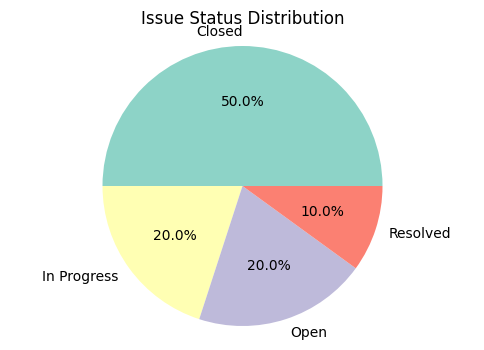

INFO:__main__:Pie chart for issue status distribution displayed.


In [13]:
import matplotlib.pyplot as plt

df_status_count = pd.read_sql_query("""
    SELECT status, COUNT(*) as count 
    FROM issues 
    GROUP BY status
""", connection)

plt.figure(figsize=(6,4))
plt.pie(df_status_count['count'], labels=df_status_count['status'], autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title("Issue Status Distribution")
plt.axis('equal')
plt.show()
logger.info("Pie chart for issue status distribution displayed.")   



## Pie Chart Observations

- Half of the issues (50%) are already Closed, indicating good progress in resolving problems.

- 20% of the issues remain In Progress, showing active efforts to address ongoing problems.

-  Another 20% are still Open, which may need prioritization or further investigation to avoid backlog.

- Only 10% of issues are marked as Resolved, suggesting some issues might be closed without complete resolution or require verification steps.

## Feature Engineering
The dataset is refined by converting date columns into datetime format to ensure accuracy in calculations. An inner join merges the issues and analysis tables on task ID, allowing for a comprehensive view of each record. A new feature calculates the number of days between issue creation and resolution, while a flag identifies tasks that took longer than seven days to resolve. Another feature captures the length of the category name to analyze classification complexity. Additionally, a flag determines whether an issue was closed within three days, providing insight into quick resolutions. This engineered dataset enables better tracking of delays, patterns, and issue management efficiency.


In [14]:
# Make sure dates are parsed correctly
df_issues['created_date'] = pd.to_datetime(df_issues['created_date'])
df_analysis['resolution_date'] = pd.to_datetime(df_analysis['resolution_date'])

# Merge to create a full view
df_combined = pd.merge(df_issues, df_analysis, on="task_id", how="inner")

# Create new features
df_combined['days_to_resolve'] = (df_combined['resolution_date'] - df_combined['created_date']).dt.days
df_combined['is_delayed'] = df_combined['days_to_resolve'] > 7
df_combined['category_length'] = df_combined['category'].apply(len)
df_combined['is_closed_quickly'] = (df_combined['status'] == 'Closed') & (df_combined['days_to_resolve'] <= 3)

# Display engineered DataFrame
display(df_combined.head())


,task_id,description,category,created_date,status,analysis_id,type_of_analysis,root_cause,resolution,resolution_date,days_to_resolve,is_delayed,category_length,is_closed_quickly
0,T23465,System outage in zone 1,Infrastructure,2024-05-01,Closed,A001,5 Whys,Power supply issue,Installed UPS,2025-05-02,366,True,14,False
1,T23468,Incorrect data on dashboard,Data Quality,2024-05-03,Open,A002,Fishbone,Wrong join logic in query,Fixed join conditions,2025-05-04,366,True,12,False
2,T23475,Delay in daily ETL process,ETL,2024-05-04,In Progress,A003,Pareto,Dependency on external API,Added retry mechanism,2025-05-05,366,True,3,False
3,T23865,Frequent login failures,Authentication,2024-05-06,Closed,A004,Root Cause Tree,Session timeout misconfig,Increased session timeout,2025-05-07,366,True,14,False
4,T23363,Missing entries in report,Reporting,2024-05-07,Open,A005,5 Whys,Scheduled job skipped,Rescheduled job,2025-05-08,366,True,9,False


## Visualizing Engineered Features
A histogram is generated to visualize the distribution of resolution times for issues. The plot uses Seaborn’s histplot function with ten bins and a kernel density estimate to highlight trends in the data. The x-axis represents the number of days taken to resolve an issue, while the y-axis shows the frequency of occurrences. This visualization helps identify common resolution time ranges and any potential outliers in the dataset.


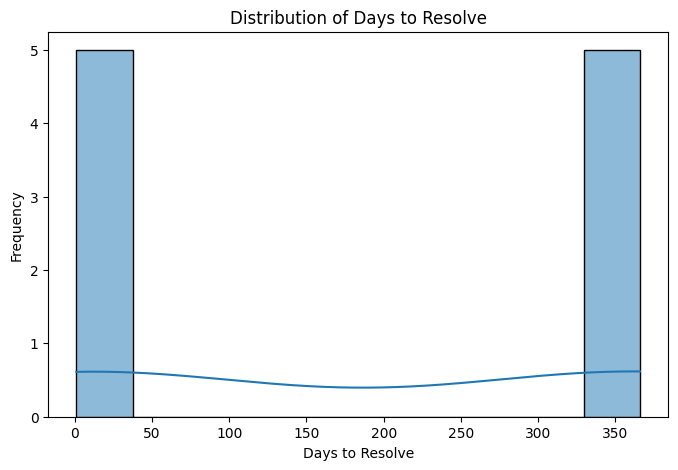

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df_combined['days_to_resolve'], bins=10, kde=True)
plt.title("Distribution of Days to Resolve")
plt.xlabel("Days to Resolve")
plt.ylabel("Frequency")
plt.show()


## Conclusion

Throughout this project, we established a structured SQLite database to store and analyze issue resolution data across multiple categories. By joining issues and analysis tables, we explored root causes, timelines, and resolution strategies. We observed that while half of the issues are marked as closed, a significant portion remains open or in progress, highlighting operational inefficiencies. Categories like Data Quality, ETL, and Deployment showed recurring delays or resolution bottlenecks. Additionally, feature engineering allowed deeper insight into how long resolutions take and whether quick closures are consistently achieved.

## Next Steps
- Automate Tracking of resolution times using engineered features like days_to_resolve and flags for delayed resolutions.

- Drill Down on High-Delay Categories (e.g., Deployment, Data Quality) to address systemic root causes.

- Introduce SLA Benchmarks into the data model to evaluate issue handling against target timelines.

- Develop Dashboards for ongoing visibility into open, delayed, and resolved issues.

- Apply Predictive Modeling to forecast issue resolution delays based on type, category, and history.